# Otimização em ação

<center>
Francisco Nogueira Calmon Sobral<BR>
Universidade Estadual de Maringá - PR - Brasil<BR>
ERMAC PR - 06 de Maio de 2025
</center>

In [3]:
using Pkg

Pkg.activate("../ermacpr25/")
Pkg.instantiate()

  Activating project at `~/personal/working/minicurso-empacotamento/ermacpr25`


In [4]:
using LinearAlgebra, Plots

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [8]:
include("../ermacpr25/src/ermacpr25.jl")

desenha_solucao_qc (generic function with 1 method)

# Resumo

  - O que é um problema de empacotamento?
  - Sobreposição entre itens
  - Alocação de itens
  - Mão na massa

# O que é um problema de empacotamento?

## Uma definição simples

Em problemas de empacotamento, desejamos **alocar** objetos em **contêineres**.

Problemas de empacotamento aparecem em diversas áreas

  - Alocação de objetos em caixas
  - Alocação de objetos em caminhões
  - Cortes de peças
  - Simulações com proteínas
  - Organização de ambientes
  - Muito, muito mais

## Mais informações

  - HIFI, Mhand; M′ HALLAH, Rym. **A literature review on circle and sphere packing problems: Models and methodologies**. Advances in Operations Research, v. 2009, n. 1, p. 150624, 2009
  - LEAO, Aline AS et al. **Irregular packing problems: A review of mathematical models**. European Journal of Operational Research, v. 282, n. 3, p. 803-822, 2020
  - E. Spetch, **Packomania**, `http://packomania.com/`, 2025

## Empacotamento de círculos e esferas

<center><img src='../figures/circle-packing.jpeg'></center>

<center><img src='../figures/sphere-packing.jpeg'></center>

### Sala Planejada

<center><img src='../figures/sala-planejada.png'></center>

### Empacotamento de triângulos

<center><img src='../figures/triangle-packing.png'></center>

### Empacotamento em 2 níveis

<center><img src='../figures/padeiro1.jpg' width=40%></center>

### Polígonos regulares ou irregulares

<center><img src='../figures/irregular-packing.jpg'></center>

### Definição do problema

  - Temos um conjunto com $N$ itens
      - Círculos
      - Quadrados
      - Polígonos
      - Esferas
      - Elipsoides
      - **Triângulos**

  - Temos um contêiner
      - Círculos, esferas
      - Quadrados, cubos
      - Retângulos, _strips_
      - Polígonos

  - Devemos **alocar** o máximo de itens no contêiner
  - Devemos encontrar o "menor" contêiner que os contém
  - Podemos ter objetos idênticos ou não
  - Não pode haver **sobreposição**

$$
\begin{array}{ll}
\min & \text{área, perímetro, nada, etc...} \\
\text{suj. a} & \text{Não sobreposição} \\
& \text{Pertinência} \\
\end{array}
$$

# Sobreposição de dois círculos

  - Círculos serão modelados por suas **coordenadas dos centros** $(x_i, y_i)$ e seu **raio** $r_i$
  - A sobreposição entre dois círculos $i$ e $j$ é dada por
  $$
  (x_i - x_j)^2 + (y_i - y_j)^2 \ge (r_i + r_j)^2
  $$
  - Função duas vezes continuamente diferenciável e **não convexa**

Modifique os valores abaixo e veja o valor da sobreposição

In [13]:
c1 = [1, 1]
r1 = 1

c2 = [1, 3]
r2 = 1

s = norm(c2 - c1)^2 - (r1 + r2)^2

println("Sobreposição = $s")

Sobreposição = 0.0


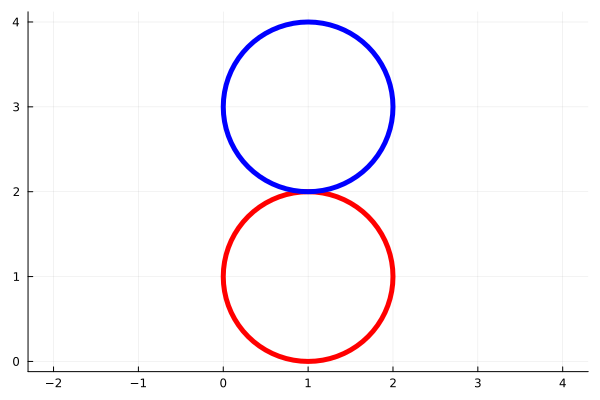

In [14]:
plot(circulo(c1, r1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(circulo(c2, r2), c=false, lc=:blue, lw=5, label=false)

# Sobreposição entre quadrados sem rotação

  - Para quadrados, iremos assumir a existência de um **quadrado base** com baricentro em $(0, 0)$ e lados $\ell_i$
  - Um quadrado $i$ será definido pelo deslocamento $(x_i, y_i)$ desse quadrado
  - A sobreposição entre os quadrados $i$ e $j$ pode ser modelada por
  $$
  \begin{split}
  \max\left\{0, x_i + \frac{\ell_i}{2} - \left(x_j - \frac{\ell_j}{2}\right)\right\}^2 \cdot
  \max\left\{0, x_j + \frac{\ell_j}{2} - \left(x_i - \frac{\ell_i}{2}\right)\right\}^2 \cdot & \\
  \cdot \max\left\{0, y_i + \frac{\ell_i}{2} - \left(y_j - \frac{\ell_j}{2}\right)\right\}^2 \cdot
  \max\left\{0, y_j + \frac{\ell_j}{2} - \left(y_i - \frac{\ell_i}{2}\right)\right\}^2 & = 0
  \end{split}
  $$
  - Função duas vezes diferenciável, com Hessiana **descontínua**.

In [22]:
v1 = [1, 2]
l1 = 2

v2 = [2.95, 2]
l2 = 2

overlap1 = max(0.0, v1[1] + l1 / 2 - (v2[1] - l2 / 2)) * 
           max(0.0, v2[1] + l2 / 2 - (v1[1] - l1 / 2)) * 
           max(0.0, v1[2] + l1 / 2 - (v2[2] - l2 / 2)) * 
           max(0.0, v2[2] + l2 / 2 - (v1[2] - l1 / 2))

overlap2 = max(0.0, v1[1] + l1 / 2 - (v2[1] - l2 / 2))^2 *
           max(0.0, v2[1] + l2 / 2 - (v1[1] - l1 / 2))^2 * 
           max(0.0, v1[2] + l1 / 2 - (v2[2] - l2 / 2))^2 * 
           max(0.0, v2[2] + l2 / 2 - (v1[2] - l1 / 2))^2

println("Medida de sobreposição: $overlap1")
println("Medida de sobreposição (diferenciável): $overlap2")

Medida de sobreposição: 0.7899999999999973
Medida de sobreposição (diferenciável): 0.6240999999999957


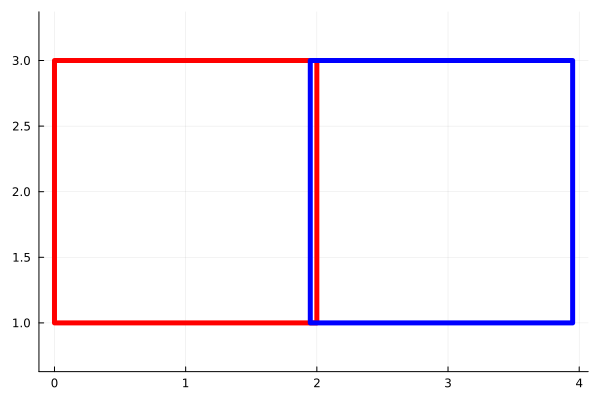

In [23]:
plot(quadrado(v1, l1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(quadrado(v2, l2), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)

# Sobreposição entre quadrados com rotação

Quando ocorre rotação, a medida simplificada de sobreposição pode não ser correta.

In [35]:
bq1 = [0, 1]
l1 = 2
θ1 = - pi / 4

bq2 = [2, 2]
l2 = 3
θ2 = π / 2;

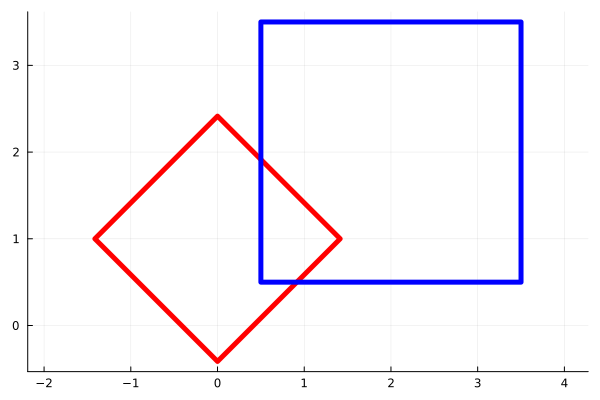

In [36]:
plot(quadrado(bq1, l1, θ1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(quadrado(bq2, l2, θ2), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)

A ideia é

  - Assumir que existe um **quadrado base** que é então rotacionado e transladado
  - Aplicar a transformação inversa do quadrado $i$ no quadrado $j$
  - Verificar se os vértices transformados do quadrado $j$ estão fora do quadrado base 

In [37]:
q_base(l) = [[-l/2 -l/2], [l/2 -l/2], [l/2 l/2], [-l/2 l/2]];

In [38]:
# Sobreposição com um quadrado SEM rotação
medida_dentro_quad(v, l, p) = max(0.0, p[1] - (v[1] - l / 2)) * 
                              max(0.0, v[1] + l / 2 - p[1]  ) *
                              max(0.0, p[2] - (v[2] - l / 2)) *
                              max(0.0, v[2] + l / 2 - p[2]  );

In [39]:
rotaciona_desloca(v, θ, p) = [v[1] + cos(θ) * p[1] - sin(θ) * p[2],
                              v[2] + sin(θ) * p[1] + cos(θ) * p[2]]

rotaciona_desloca_inv(v, θ, p) = [cos(-θ) * (p[1] - v[1]) - sin(-θ) * (p[2] - v[2]),
                                  sin(-θ) * (p[1] - v[1]) + cos(-θ) * (p[2] - v[2])];

In [41]:
overlap3 = sum(medida_dentro_quad([0,0], l1, rotaciona_desloca_inv(bq1, θ1, rotaciona_desloca(bq2, θ2, p)))
               for p in q_base(l2)) +
           sum(medida_dentro_quad([0,0], l2, rotaciona_desloca_inv(bq2, θ2, rotaciona_desloca(bq1, θ1, p)))
               for p in q_base(l1))

println("Medida de sobreposição com rotação: $overlap3")

Medida de sobreposição com rotação: 2.883567811865475


Para **retângulos** e outros polígonos convexos a estratégia simplificada dos vértices **não funciona**. É necessário adicionar mais pontos, conhecidos como **sentinelas**

> E. G. Birgin, J. M. Martínez, W. F. Mascarenhas and D. P. Ronconi, Method of Sentinels for Packing Items within Arbitrary Convex Regions, Journal of the Operational Research Society 57, pp. 735-746, 2006. 

> W. F. Mascarenhas and E. G. Birgin, Using sentinels to detect intersections of convex and nonconvex polygons, Computational & Applied Mathematics 29, pp. 247-267, 2010. 

Veja o exemplo sem rotação

In [42]:
bq1 = [1, 2]
l1 = 2
θ1 = 0

v2 = [2, 2]
l2 = 2
θ2 = 0

overlap3 = sum(medida_dentro_quad([0,0], l1, rotaciona_desloca_inv(bq1, θ1, rotaciona_desloca(bq2, θ2, p)))
               for p in q_base(l2)) +
           sum(medida_dentro_quad([0,0], l2, rotaciona_desloca_inv(bq2, θ2, rotaciona_desloca(bq1, θ1, p)))
               for p in q_base(l1))

println("Medida de sobreposição com rotação: $overlap3")

Medida de sobreposição com rotação: 0.0


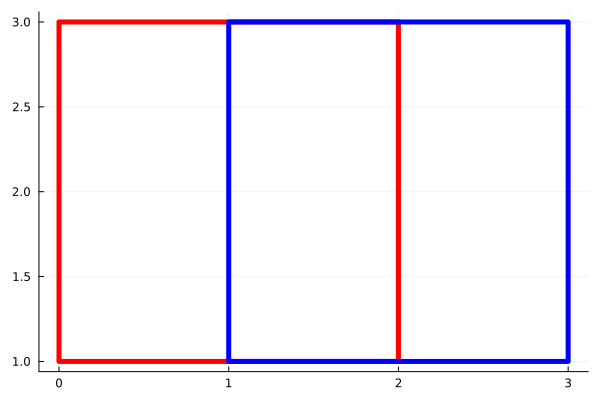

In [43]:
plot(quadrado(bq1, l1, θ1), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)
plot!(quadrado(bq2, l2, θ2), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)

É necessário adicionar mais **5 sentinelas** neste caso:

In [44]:
sentinelas_quadrado_base(l) = [[-l/2 -l/2], [l/2 -l/2], [l/2 l/2], [-l/2 l/2], [0, 0],
                    [0, l/2], [0, -l/2], [l/2, 0], [-l/2, 0]];

In [45]:
overlap3 = sum(medida_dentro_quad([0,0], l1, rotaciona_desloca_inv(bq1, θ1, rotaciona_desloca(bq2, θ2, p)))
               for p in sentinelas_quadrado_base(l2)) +
           sum(medida_dentro_quad([0,0], l2, rotaciona_desloca_inv(bq2, θ2, rotaciona_desloca(bq1, θ1, p)))
               for p in sentinelas_quadrado_base(l1))

println("Medida de sobreposição com rotação: $overlap3")

Medida de sobreposição com rotação: 2.0


# Sobreposição entre triângulos

Para polígonos convexos com ângulos menores que $\pi / 2$, não existe um número finito de sentinelas.

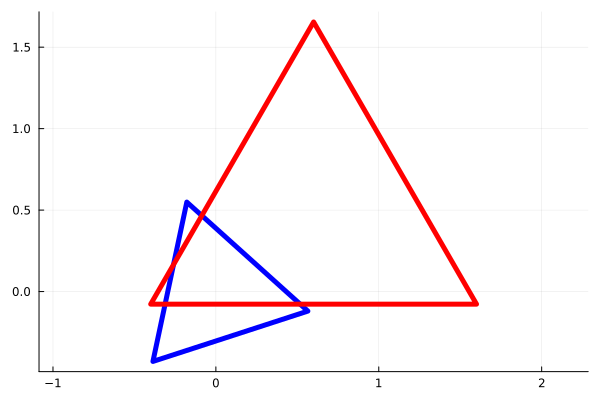

In [46]:
bc1 = [0, 0]
l1  = 1.0
θ1  = π / 10

bc2 = [0.6, 0.5]
l2 = 2.0
θ2 = 0.0

plot(triangulo_eq(bc1, θ1, l1), c=false, lc=:blue, lw=5, label=false, aspect_ratio=true)
plot!(triangulo_eq(bc2, θ2, l2), c=false, lc=:red, lw=5, label=false, aspect_ratio=true)

# Alocação de itens

## Círculos em regiões circulares

Para verificarmos se um círculo de centro $(x, y)$ e raio $r$ encontra-se dentro de uma região circular de raio $R$, assumimos que se ela **na origem** e verificamos se
$$
x^2 + y^2 \le (R - r)^2
$$

In [49]:
c1 = [2, 0.5]
r1 = 1

R = 3

alocacao_cc = c1[1]^2 + c1[2]^2 - (R - r1)^2

println("Alocação no círculo: $alocacao_cc")

Alocação no círculo: 0.25


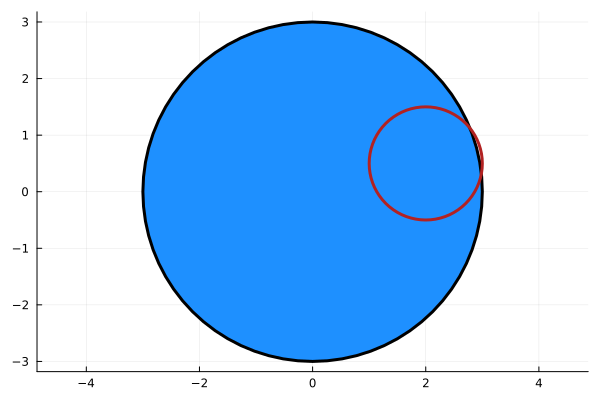

In [50]:
plot(circulo([0, 0], R), c=:dodgerblue, lc=:black, lw=3, label=false, aspect_ratio=true)
plot!(circulo(c1, r1), c=false, lc=:firebrick, lw=3, label=false, aspect_ratio=true)

## Círculos em retângulos

A alocação de um círculo com centro $(x, y)$ e raio $r$ em regiões retangulares **fixas** $W \times L$ é dada por restrições **de caixa**:
$$
\begin{split}
r \le x & \le W - r \\
r \le y & \le L - r \\
\end{split}
$$

Caso $W$ ou $L$ sejam variáveis, então as restrições tornam-se **lineares**.

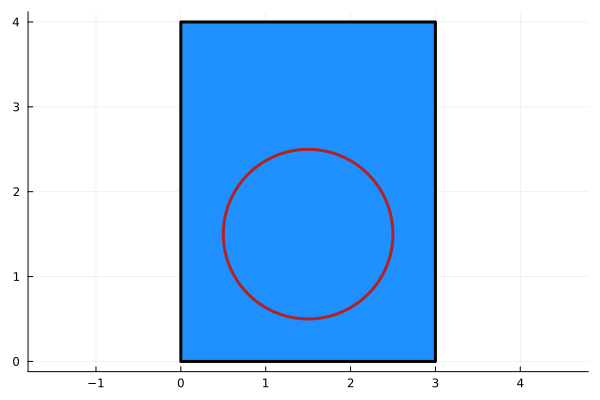

In [51]:
c1 = [1.5, 1.5]
r1 = 1

W = 3
L = 4

plot(caixa(L, W), c=:dodgerblue, lc=:black, lw=3, label=false, aspect_ratio=true)
plot!(circulo(c1, r1), c=false, lc=:firebrick, lw=3, label=false, aspect_ratio=true)


## Círculos em polígonos convexos 

Para polígonos convexos quaisquer precisamos calcular a **equação** que define cada um dos seus lados
$$
(n_x^l, n_y^l)^T (x, y) \le b_l
$$
onde $n^l$ é o vetor **normal** associado com a restrição, $\|n^l\| = 1$.

O círculo com centro $(x, y)$ e raio $r$ satisfaz essa restrição se
$$
(n_x^l, n_y^l)^T \big((x, y) + r \cdot (n_x^l, n_y^l)\big) \le b^l \quad \forall l
$$
ou melhor
$$
\begin{split}
n_x^l x + n_y^l y & \le b^l - r \quad \forall l
\end{split}
$$

In [52]:
c1 = [2, 1.5]
r1 = 1.0

poligono_qualquer = [0 0; 4 0; 3 3; 1 4]

w = poligono_qualquer[end, :]

for v in eachrow(poligono_qualquer)

    n = [(v[2] - w[2]), -(v[1] - w[1])]

    println("Alocação em uma restrição do polígono: $(dot(n, c1 + r1 * n / norm(n)) - dot(n, w))")

    w = v

end

Alocação em uma restrição do polígono: -2.3768943743823394
Alocação em uma restrição do polígono: -2.0
Alocação em uma restrição do polígono: -1.3377223398316218
Alocação em uma restrição do polígono: -1.7639320225002102


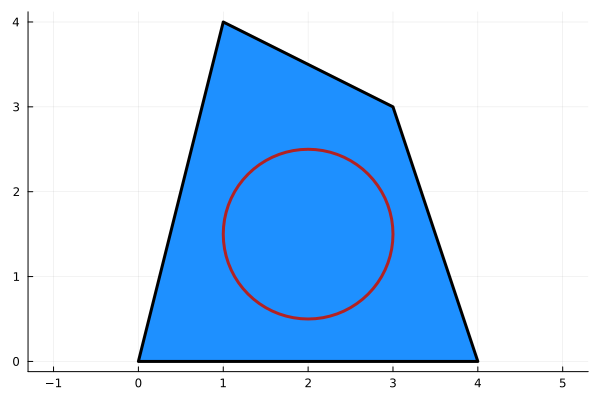

In [53]:
plot(poligono(poligono_qualquer), c=:dodgerblue, lc=:black, lw=3, label=false, aspect_ratio=true)
plot!(circulo(c1, r1), c=false, lc=:firebrick, lw=3, label=false, aspect_ratio=true)

## Polígonos convexos em círculos

Para um polígono convexo definido por seus **vértices base** (ou sentinelas) $V = \{v^1, \dots, v^m\}$, onde $v^l = (x^l, y^l)$, rotação $\theta$ e deslocamento $(x, y)$ estar alocado no círculo com raio $R$ significa satisfazer
$$
\left(x + \cos(\theta) x^l - \sin(\theta) y^l \right)^2 + \left(y + \sin(\theta) x^l + \cos(\theta) y^l\right)^2 \le R^2 \qquad l = 1, \dots, m
$$

Denotando por $P$ a **transformação linear** associada com o posicionamento desse polígono, ou seja
$$
P(v^l) = \left( x + \cos(\theta) x^l - \sin(\theta) y^l, y + \sin(\theta) x^l + \cos(\theta) y^l \right)
$$
podemos escrever
$$
\|P(v^l)\|_2^2 \le R^2 \qquad l = 1, \dots, m
$$

## Polígonos convexos em polígonos convexos

Neste caso temos o polígono definido por seus **vértices base** (ou sentinelas) $V = \{v^1, \dots, v^m\}$, rotação $\theta$ e deslocamento $(x, y)$ definindo o posicionamento $P$ e iremos verificar se pertence ao polígono convexo formado por desigualdades da forma
$$
(n_x^k, n_y^k)^T (x, y) \le b_k \quad l = 1, \dots, K
$$
com $n^k$ unitário.

Logo, devemos satisfazer as seguintes restrições
$$
\left(n^k\right)^T P(v^l) \le b_k, \qquad l = 1, \dots, m \ \text{e}\ k = 1, \dots, K
$$

**Observação**: geralmente, o polígono será dado por seus vértices e o algoritmo deverá calcular as equações! Faremos isso abaixo.

# Problemas interessantes

In [57]:
using JuMP, Ipopt

## Problema 1

Cabem $10$ círculos de raio 1 em um quadrado $7 \times 7$?

$$
\begin{array}{llr}
\min & \text{nada} & \\
\text{s. a} & (x_i - x_j)^2 + (y_i - y_j)^2 \ge 4 & 1 \le i < j < 10 \\
& 1 \le x_i \le 6 & i = 1, \dots, 10 \\
& 1 \le y_i \le 6 & i = 1, \dots, 10 
\end{array}
$$

In [61]:
model = Model(Ipopt.Optimizer)

@variable(model, 1 <= xC[i = 1:10] <= 6, start=7*rand())
@variable(model, 1 <= yC[i = 1:10] <= 6, start=7*rand())

@NLconstraint(model, [i = 1:10, j = i + 1:10], (xC[i] - xC[j])^2 + (yC[i] - yC[j])^2 >= 4)

@objective(model, Min, 0);

In [ ]:
latex_formulation(model)

$$ \begin{aligned}
\min\quad & 0\\
\text{Subject to} \quad & xC_{1} \geq 1\\
 & xC_{2} \geq 1\\
 & xC_{3} \geq 1\\
 & xC_{4} \geq 1\\
 & xC_{5} \geq 1\\
 & xC_{6} \geq 1\\
 & xC_{7} \geq 1\\
 & xC_{8} \geq 1\\
 & xC_{9} \geq 1\\
 & xC_{10} \geq 1\\
 & yC_{1} \geq 1\\
 & yC_{2} \geq 1\\
 & yC_{3} \geq 1\\
 & yC_{4} \geq 1\\
 & yC_{5} \geq 1\\
 & yC_{6} \geq 1\\
 & yC_{7} \geq 1\\
 & yC_{8} \geq 1\\
 & yC_{9} \geq 1\\
 & yC_{10} \geq 1\\
 & xC_{1} \leq 6\\
 & xC_{2} \leq 6\\
 & xC_{3} \leq 6\\
 & xC_{4} \leq 6\\
 & xC_{5} \leq 6\\
 & xC_{6} \leq 6\\
 & xC_{7} \leq 6\\
 & xC_{8} \leq 6\\
 & xC_{9} \leq 6\\
 & xC_{10} \leq 6\\
 & yC_{1} \leq 6\\
 & yC_{2} \leq 6\\
 & yC_{3} \leq 6\\
 & yC_{4} \leq 6\\
 & yC_{5} \leq 6\\
 & yC_{6} \leq 6\\
 & yC_{7} \leq 6\\
 & yC_{8} \leq 6\\
 & yC_{9} \leq 6\\
 & yC_{10} \leq 6\\
 & ((xC[1] - xC[2]) ^ {2.0} + (yC[1] - yC[2]) ^ {2.0}) - 4.0 \geq 0\\
 & ((xC[1] - xC[3]) ^ {2.0} + (yC[1] - yC[3]) ^ {2.0}) - 4.0 \geq 0\\
 & ((xC[1] - xC[4]) ^ {2.0} + (yC[1] -

In [66]:
set_attribute(model, "print_level", 0)

optimize!(model)

In [68]:
println("""
termination_status = $(termination_status(model))
primal_status      = $(primal_status(model))
objective_value    = $(objective_value(model))
""")

termination_status = LOCALLY_SOLVED
primal_status      = FEASIBLE_POINT
objective_value    = 0.0



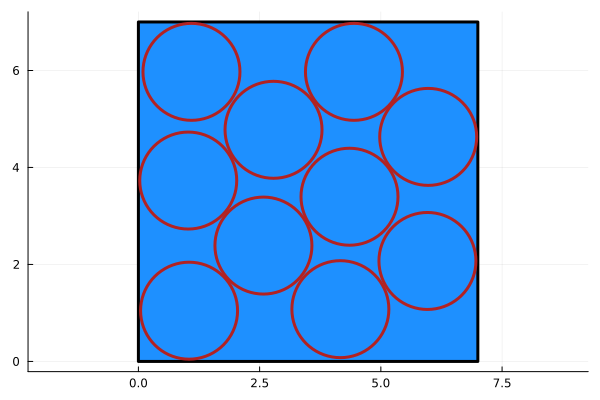

In [69]:
desenha_solucao_cq([1 for i = 1:10], value.(xC), value.(yC), 7, 7)

## Problema 1 - outra formulação

Cabem $10$ círculos de raio 1 em um quadrado $7 \times 7$?

$$
\begin{array}{llr}
\min & \sum_{i < j} \max\{0, 4 - (x_i - x_j)^2 - (y_i - y_j)^2\}^2 & \\
\text{s. a} & 1 \le x_i \le 6 & i = 1, \dots, 10 \\
& 1 \le y_i \le 6 & i = 1, \dots, 10 
\end{array}
$$

Esta versão é adequada para algoritmos que lidam bem com restrições de caixa.

In [71]:
model = Model(Ipopt.Optimizer)

@variable(model, 1 <= xC[i = 1:10] <= 6, start=7*rand())
@variable(model, 1 <= yC[i = 1:10] <= 6, start=7*rand())

@objective(model, Min, sum(max(0, 4 - (xC[i] - xC[j])^2 - (yC[i] - yC[j])^2)^2 for i = 1:10, j = i + 1:10));

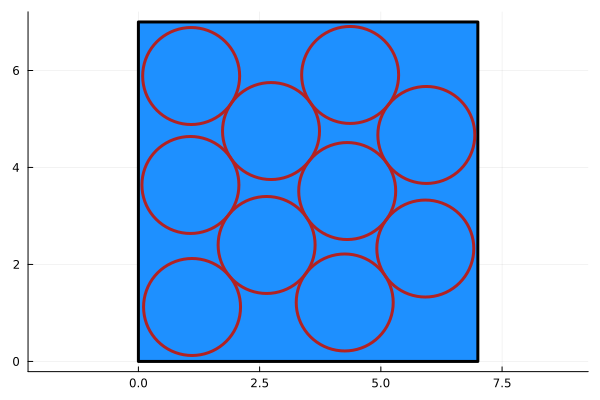

In [72]:
set_attribute(model, "print_level", 0)

optimize!(model)

desenha_solucao_cq([1 for i = 1:10], value.(xC), value.(yC), 7, 7)

### Desafio

Você conseguiria alterar o(s) código(s) acima para lidar com um número $N$ arbitrário de círculos? E com raios diferentes?

## Problema 2

Qual o **menor** quadrado que contém 10 círculos?

$$
\begin{array}{llr}
\min & L & \\
\text{s. a} & (x_i - x_j)^2 + (y_i - y_j)^2 \ge 4 & 1 \le i < j < 10 \\
& 1 \le x_i \le L - 1 & i = 1, \dots, 10 \\
& 1 \le y_i \le L - 1 & i = 1, \dots, 10 
\end{array}
$$

In [73]:
model = Model(Ipopt.Optimizer)

L_inicial = (10 + 10 * rand()) * π

@variable(model, L, start=L_inicial)
@variable(model, 1 <= xC[i = 1:10], start=L_inicial*rand())
@variable(model, 1 <= yC[i = 1:10], start=L_inicial*rand())

@NLconstraint(model, [i = 1:10, j = i + 1:10], (xC[i] - xC[j])^2 + (yC[i] - yC[j])^2 >= 4)

@constraint(model, [i = 1:10], xC[i] <= L - 1)
@constraint(model, [i = 1:10], yC[i] <= L - 1)

@objective(model, Min, L);

In [74]:
set_attribute(model, "print_level", 0)

optimize!(model)

In [75]:
println("""
termination_status = $(termination_status(model))
primal_status      = $(primal_status(model))
objective_value    = $(objective_value(model))
""")

termination_status = LOCALLY_SOLVED
primal_status      = FEASIBLE_POINT
objective_value    = 6.760278807074645



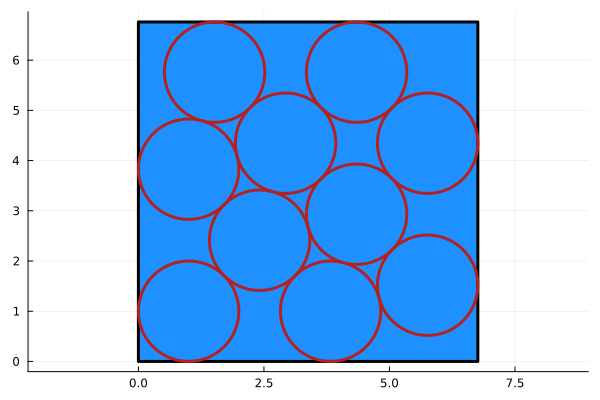

In [76]:
desenha_solucao_cq([1 for i = 1:10], value.(xC), value.(yC), value(L))

## Problema 3

Consegumos colocar $N=6$ quadrados de lado $\ell = 1$ em um círculo de raio $R=2$?

$$
\begin{array}{llr}
\min & \sum_{i \ne j}  \sum_{v \in V} \max\{0, P_i^{-1}(P_j(v)) + \ell / 2\}^2 \cdot \max\{0, \ell / 2 - P_i^{-1}(P_j(v))\}^2 \cdot & \\
& \hspace{2cm} \cdot \max\{0, P_i^{-1}(P_j(v)) + \ell / 2\}^2 \cdot \max\{\ell / 2 - P_i^{-1}(P_j(v))\}^2 & \\[0.5cm]
\text{s. a} 
& \big\|P_i(v)\big\|^2 \le R^2 \qquad i = 1, \dots, N\ \text{e}\ \forall v \in V & \\
\end{array}
$$

onde $P_i$ é a rotação seguida do deslocamento do **quadrado base** para o quadrado $i$, $P_i^{-1}$ sua inversa e $V$ é o conjunto de sentinelas.

In [88]:
model = Model(Ipopt.Optimizer)

R_inicial = 2
N = 5
ℓ = 1

@variable(model, xQ[i = 1:N], start=-R_inicial + 2 * R_inicial * rand())
@variable(model, yQ[i = 1:N], start=-R_inicial + 2 * R_inicial * rand())
@variable(model, θ[i = 1:N], start = 2 * π * rand());

In [97]:
V = sentinelas_quadrado_base(ℓ)
M = length(V)

px_i = @expression(model, [i = 1:N, k = 1:M], xQ[i] + cos(θ[i]) * V[k][1] - sin(θ[i]) * V[k][2])
py_i = @expression(model, [i = 1:N, k = 1:M], yQ[i] + sin(θ[i]) * V[k][1] + cos(θ[i]) * V[k][2])

px_im1 = @expression(model, [i = 1:N, j = 1:N, k = 1:M],
            cos(- θ[i]) * (px_i[j, k] - xQ[i]) - sin(- θ[i]) * (py_i[j, k] - yQ[i]))
py_im1 = @expression(model, [i = 1:N, j = 1:N, k = 1:M],
             sin(- θ[i]) * (px_i[j, k] - xQ[i]) + cos(- θ[i]) * (py_i[j, k] - yQ[i]))

@constraint(model, [i = 1:N, k = 1:M], px_i[i, k]^2 + py_i[i, k]^2 <= R_inicial^2)

@objective(model, Min, sum( max(0.0, px_im1[i, j, k] + ℓ/2)^2 *
                            max(0.0, - px_im1[i, j, k] + ℓ/2)^2 *
                            max(0.0, py_im1[i, j, k] + ℓ/2)^2 *
                            max(0.0, - py_im1[i, j, k] + ℓ/2)^2 
                        for i = 1:N, j = 1:N, k = 1:M if i != j));

In [98]:
set_attribute(model, "print_level", 0)

optimize!(model)

In [99]:
println("""
termination_status = $(termination_status(model))
primal_status      = $(primal_status(model))
objective_value    = $(objective_value(model))
""")

termination_status = LOCALLY_SOLVED
primal_status      = FEASIBLE_POINT
objective_value    = 0.016100680708806065



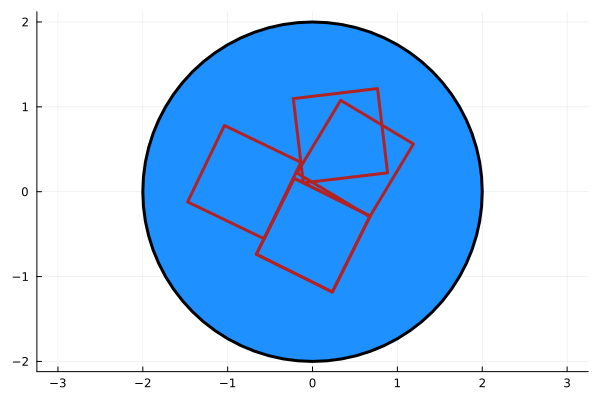

In [100]:
desenha_solucao_qc(ℓ, value.(xQ), value.(yQ), value.(θ), R_inicial)

### Desafios

  1. Será que seria possível colocar a não sobreposição como restrição?
  1. Será que seria possível encontrar o raio mínimo?